# Restructure datasets to match 2012/2013

## Acoustic Data

First, let's look at an example of the 2012/2013 data to confirm the format we want.

In [1]:
import pandas as pd
from progressBar import log_progress
from glob import glob
import sys
import numpy as np
sys.path.insert(1, 'C:/Users/Robert/Documents/projects/rltools')
from akMaps import akMaps
mapper = akMaps.akMaps()
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [45]:
df2012 = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v2.csv')
df2013 = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v2.csv')
df2012.head()

,Latitude,Longitude,Bottom depth (m),Fish 38 kHz sA (m^2 nmi^-2),Zooplankton 120 kHz sA (m^2 nmi^-2),Arctic cod (No. m^-2),Saffron cod (No. m^-2),Capelin (No. m^-2),herring (No. m^-2)
0,66.043,-168.57,54.804,4.0635,0.554960,0.0,0.0,0.017604,0.0
1,66.035,-168.57,54.468,4.0422,0.312650,0.0,0.0,0.017512,0.0
2,66.027,-168.56,54.639,3.0132,0.022784,0.0,0.0,0.013054,0.0
3,66.019,-168.56,54.762,1.4204,0.016794,0.0,0.0,0.006154,0.0
4,66.012,-168.55,54.590,2.7783,0.043315,0.0,0.0,0.012036,0.0


Now let's read in and write out matching files for 2017, 2018, and 2019, starting with 2018

In [34]:
df2018 = pd.read_pickle('../data/acousticData/2018/dfSurvey2.pkl')
df2018 = df2018[['latC','lonC','depthMean','nasc']].rename(columns={'latC':'Latitude','lonC':'Longitude','depthMean':'Bottom depth (m)','nasc':'Fish 38 kHz sA (m^2 nmi^-2)'})
df2018.to_csv('../data/acousticData/2018/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2018.csv')

Now 2017 and 2019

In [8]:
dfSurveys = pd.read_csv('../data/acousticData/2017_2019/mbaIntegrationResults.csv')
dfSurveys = dfSurveys[dfSurveys.CLASS!= 'SURFTURB']

df2017 = dfSurveys[dfSurveys.SURVEY==201701]
df2017 = df2017.groupby(['INTERVAL','END_LATITUDE','END_LONGITUDE', 'MEAN_BOTTOM_DEPTH'])[['PRC_NASC']].sum().reset_index()
df2017 = df2017[['END_LATITUDE','END_LONGITUDE', 'MEAN_BOTTOM_DEPTH','PRC_NASC']].rename(columns={'END_LATITUDE':'Latitude','END_LONGITUDE':'Longitude','MEAN_BOTTOM_DEPTH':'Bottom depth (m)','PRC_NASC':'Fish 38 kHz sA (m^2 nmi^-2)'})
df2017.to_csv('../data/acousticData/2017_2019//Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv')

df2019 = dfSurveys[dfSurveys.SURVEY==201901]
df2019 = df2019.groupby(['INTERVAL','END_LATITUDE','END_LONGITUDE', 'MEAN_BOTTOM_DEPTH'])[['PRC_NASC']].sum().reset_index()
df2019 = df2019[['END_LATITUDE','END_LONGITUDE', 'MEAN_BOTTOM_DEPTH','PRC_NASC']].rename(columns={'END_LATITUDE':'Latitude','END_LONGITUDE':'Longitude','MEAN_BOTTOM_DEPTH':'Bottom depth (m)','PRC_NASC':'Fish 38 kHz sA (m^2 nmi^-2)'})
df2019.to_csv('../data/acousticData/2017_2019//Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv')

Ok, now we can use the chukchi map function I have set up and look at the time series from all 5 organized files

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


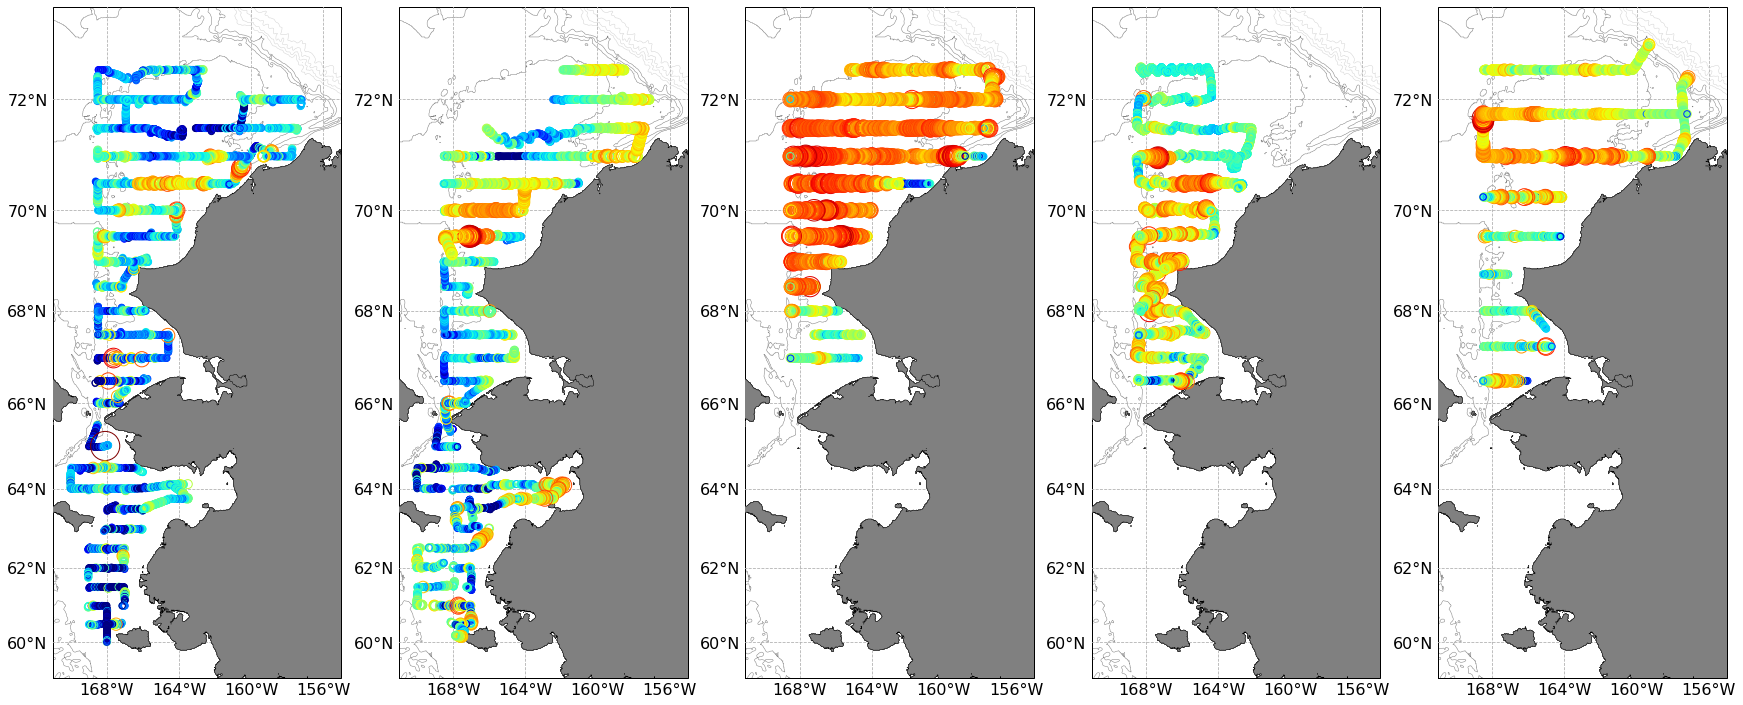

In [2]:
df2012Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v2.csv')
df2013Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2013_v2.csv')
df2017Summary = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv')
df2018Summary = pd.read_csv('../data/acousticData/2018/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2018.csv')
df2019Summary = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv')

figure = plt.figure(figsize=(30,20))
ax=plt.subplot(151,projection=ccrs.Mercator())
mapper.chukchiScatter(df2012Summary.Latitude, df2012Summary.Longitude, np.log10(df2012Summary['Fish 38 kHz sA (m^2 nmi^-2)']),4,ax=ax)
ax=plt.subplot(152,projection=ccrs.Mercator())
mapper.chukchiScatter(df2013Summary.Latitude, df2013Summary.Longitude, np.log10(df2013Summary['Fish 38 kHz sA (m^2 nmi^-2)']),4,ax=ax)
ax=plt.subplot(153,projection=ccrs.Mercator())
mapper.chukchiScatter(df2017Summary.Latitude, df2017Summary.Longitude, np.log10(df2017Summary['Fish 38 kHz sA (m^2 nmi^-2)']),4,ax=ax)
ax=plt.subplot(154,projection=ccrs.Mercator())
mapper.chukchiScatter(df2018Summary.Latitude, df2018Summary.Longitude, np.log10(df2018Summary['Fish 38 kHz sA (m^2 nmi^-2)']),4,ax=ax)
ax=plt.subplot(155,projection=ccrs.Mercator())
mapper.chukchiScatter(df2019Summary.Latitude, df2019Summary.Longitude, np.log10(df2019Summary['Fish 38 kHz sA (m^2 nmi^-2)']),4,ax=ax)

## Catch Data

This is a bit more complicated since there are two versions of these tables, both summed and by length class. I'm gonna start with length class.

In [85]:
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2012_v2.csv')
df2012

,Latitude,Longitude,0.5-1.5 cm,1.5-2.5 cm,2.5-3.5 cm,3.5-4.5 cm,4.5-5.5 cm,5.5-6.5 cm,6.5-7.5 cm,7.5-8.5 cm,...,20.5-21.5 cm,21.5-22.5 cm,22.5-23.5 cm,23.5-24.5 cm,24.5-25.5 cm,25.5-26.5 cm,26.5-27.5 cm,27.5-28.5 cm,28.5-29.5 cm,29.5-30.5 cm
0,66.043,-168.57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,66.035,-168.57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,66.027,-168.56,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,66.019,-168.56,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,66.012,-168.55,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,60.039,-167.99,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6266,60.031,-167.99,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6267,60.023,-167.99,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6268,60.014,-168.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Ok, so we need to make a n Interval (row) by length (column) for each species (sheet)

In [ ]:
dfSurvey = pd.read_csv('../data/catchData/2017_2019/mbaCatchResults.csv')
for survey in [201701,201901]:
    dfCur =  dfSurvey[dfSurvey.SURVEY == survey]
    for spec in dfCur.SPECIES_CODE.unique():
        dfHold = pd.DataFrame({'Interval':dfCur.INTERVAL,'Latitude':dfCur.END_LATITUDE, 'Longitude':dfCur.END_LONGITUDE})
        dfHold = dfHold.groupby(['Interval','Latitude','Longitude']).sum()
        dfHold = dfHold.reset_index()
        print(survey, spec)
        if spec == 21740: # since we're combining as above, lets skip this species code all together
            continue
        for length in log_progress(range(1,max(dfCur.LENGTH)+1), every=1):
            curLen = []
            for inter in dfHold.Interval.unique():
                if spec == 21744: # when pollock comes up, lets combine all the pollock numbers of age0 and adult
                    curLen.append(dfCur[(dfCur.INTERVAL== inter) & ((dfCur.SPECIES_CODE== 21744)|(dfCur.SPECIES_CODE== 21740))& (dfCur.LENGTH == length)]['NUMBERS_NM2'].sum()/(1852*1852))
                else:
                    curLen.append(dfCur[(dfCur.INTERVAL== inter) & (dfCur.SPECIES_CODE== spec) & (dfCur.LENGTH == length)]['NUMBERS_NM2'].sum()/(1852*1852))
            dfHold[str(length)] = curLen
        dfHold.to_csv('../data/catchData/2017_2019/Arctic_EIS_'+str(survey)+'_'+str(spec)+'.csv',index=False)

And now for the summary tables. These match the acoustic along track summaries, and in the future can be combined.

In [8]:
def buildCatchSummary(fileDir):
    species = {'21725':'Arctic cod','23041':'Capelin', '21735':'Saffron cod', '21744':'Pollock', '21720':'Pacific cod'}
    files = glob(fileDir)
    dfStart = pd.read_csv(files[0])[['Interval','Latitude','Longitude']]
    for file in files:
        spec = file.split('_')[-1][:5]
        dfCur = pd.read_csv(file)
        column = [label for label in dfCur.columns if len(label) < 3]
        dfSum = pd.DataFrame({'Interval':dfCur.Interval, 'Latitude':dfCur.Latitude,'Longitude':dfCur.Longitude,species[spec]+' (No. m^-2)':dfCur.loc[:,column].sum(axis=1)})
        dfStart = dfStart.merge(dfSum, on=['Interval','Latitude','Longitude'])
    return dfStart

buildCatchSummary('../data/catchData/2017_2019/Arctic_EIS_201701*.csv').to_csv('../data/catchData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv', index=False)
buildCatchSummary('../data/catchData/2017_2019/Arctic_EIS_201901*.csv').to_csv('../data/catchData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv', index=False)

Now as we did above, we should be able to visualize the fish time series, so let's see Arctic cod as an example

In [54]:
np.log10(50*150)

3.8750612633917

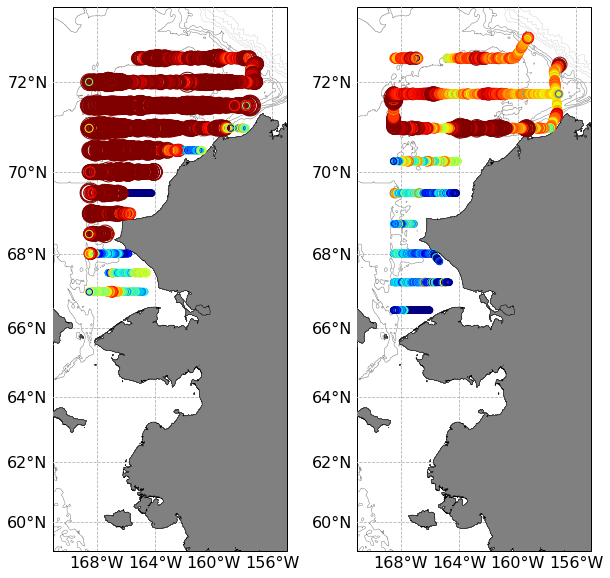

In [52]:
# Total gadids in 2017 and 2019
figure = plt.figure(figsize=(10,10))
ax=plt.subplot(121,projection=ccrs.Mercator())
mapper.chukchiScatter(df2017Summary.Latitude, df2017Summary.Longitude,np.log10(df2017Summary[['Arctic cod (No. m^-2)','Saffron cod (No. m^-2)','Pollock (No. m^-2)','Pacific cod (No. m^-2)']].sum(axis=1)*150),3.87,ax=ax)
ax=plt.subplot(122,projection=ccrs.Mercator())
mapper.chukchiScatter(df2019Summary.Latitude, df2019Summary.Longitude,np.log10(df2019Summary[['Arctic cod (No. m^-2)','Saffron cod (No. m^-2)','Pollock (No. m^-2)','Pacific cod (No. m^-2)']].sum(axis=1)*150),3.87,ax=ax)

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


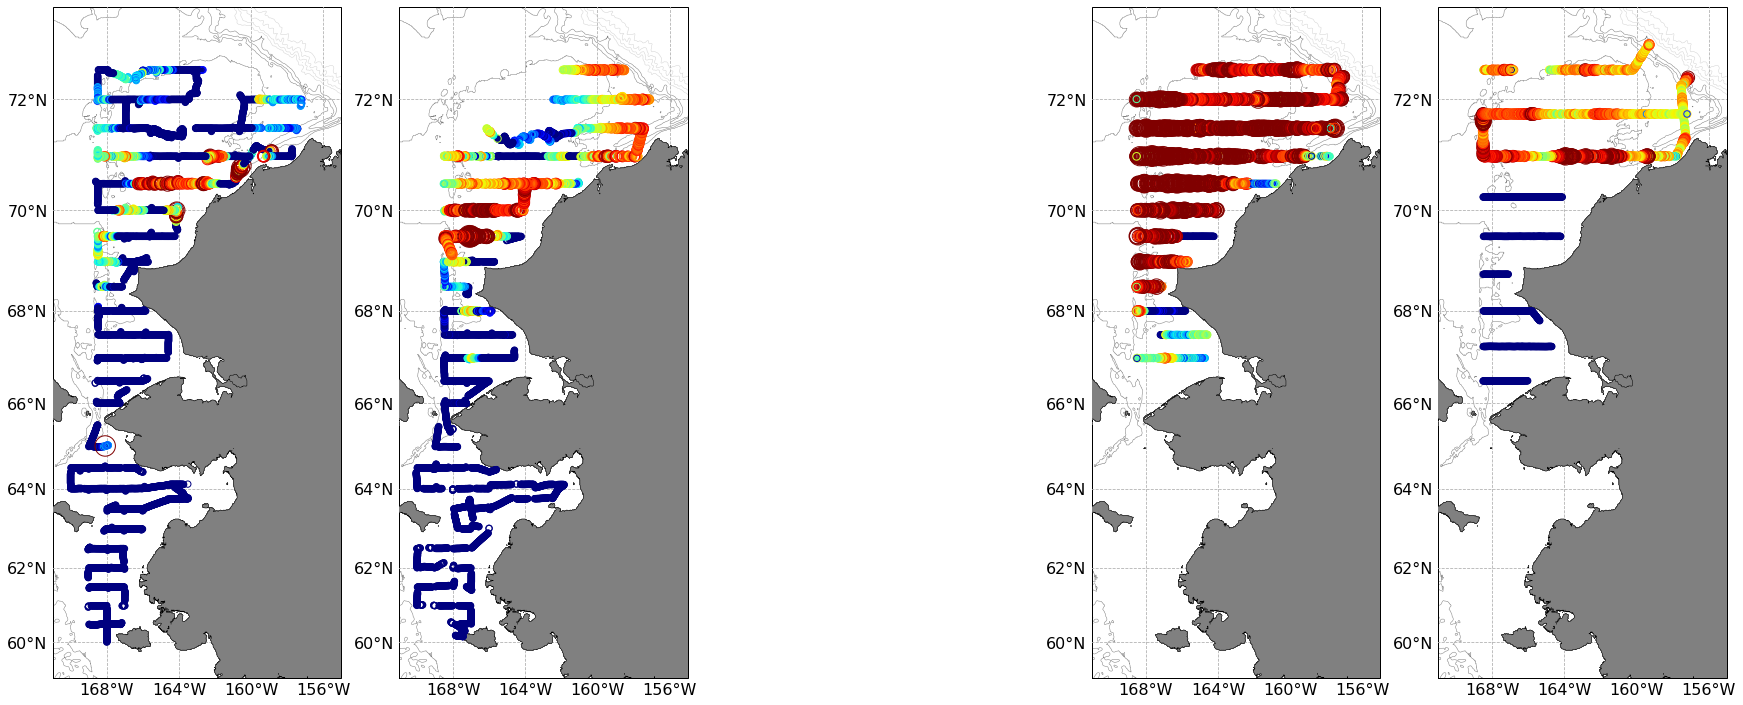

In [2]:
# For 2012/2013, the fish totals are in the same files as the acoustics
df2012Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v2.csv') 
df2013Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2013_v2.csv')
df2017Summary = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv')
df2019Summary = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv')

figure = plt.figure(figsize=(30,20))
ax=plt.subplot(151,projection=ccrs.Mercator())
mapper.chukchiScatter(df2012Summary.Latitude, df2012Summary.Longitude, np.log10(df2012Summary['Arctic cod (No. m^-2)']*100),3,ax=ax)
ax=plt.subplot(152,projection=ccrs.Mercator())
mapper.chukchiScatter(df2013Summary.Latitude, df2013Summary.Longitude, np.log10(df2013Summary['Arctic cod (No. m^-2)']*100),3,ax=ax)
ax=plt.subplot(154,projection=ccrs.Mercator())
mapper.chukchiScatter(df2017Summary.Latitude, df2017Summary.Longitude, np.log10(df2017Summary['Arctic cod (No. m^-2)']*100),3,ax=ax)
ax=plt.subplot(155,projection=ccrs.Mercator())
mapper.chukchiScatter(df2019Summary.Latitude, df2019Summary.Longitude, np.log10(df2019Summary['Arctic cod (No. m^-2)']*100),3,ax=ax)

In [88]:
np.log(0.001)

-6.907755278982137

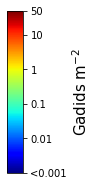

In [95]:
import matplotlib as mpl
fig = plt.figure(figsize=(.25, 15))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=np.log10(0.001*150), vmax=np.log10(50*150))
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='vertical',
                                ticks=[np.log10(0.001*150),np.log10(0.01*150),np.log10(0.1*150),np.log10(1*150),np.log10(10*150),np.log10(50*150)])
cb1.set_label('Gadids m$^{-2}$',fontsize=15)
cb1.ax.set_yticklabels(['<0.001','0.01','0.1','1','10','50']);

### Dask example of interval by length sorting
Because this is an iterate-by-row process, it's not significantly faster, but I should I'd give it a shot.

In [1]:
from distributed import Client
client = Client()
client

In [ ]:
import pandas as pd
import dask
import dask.dataframe as dd

@dask.delayed
def readCurFile(fname,survey):
    dfSurvey = dd.read_csv(fname)
    dfCur =  dfSurvey[dfSurvey.SURVEY == survey]
    dfHold = dfCur[['INTERVAL','END_LATITUDE','END_LONGITUDE']].drop_duplicates().compute()
    return dfCur, dfHold


@dask.delayed
def processFile(dfHold, dfCur,spec):        
    for length in range(1,max(dfCur.LENGTH)+1):
        curLen = []
        for inter in dfHold.INTERVAL.unique():
            if spec == 21744: # when pollock comes up, lets combine all the pollock numbers of age0 and adult
                curLen.append(dfCur[(dfCur.INTERVAL== inter) & ((dfCur.SPECIES_CODE== 21744)|(dfCur.SPECIES_CODE== 21740))& (dfCur.LENGTH == length)]['NUMBERS_NM2'].sum()/(1852*1852))
            else:
                curLen.append(dfCur[(dfCur.INTERVAL== inter) & (dfCur.SPECIES_CODE== spec) & (dfCur.LENGTH == length)]['NUMBERS_NM2'].sum()/(1852*1852))
        dfHold[str(length)] = curLen
    return dfHold
    

def runFiles(fname):
    for survey in [201701,201901]:
        dfCur, dfHold = readCurFile(fname, survey).compute()
        for spec in dfCur.SPECIES_CODE.unique().compute():
            if spec == 21740:
                continue
            else:
                dfHold = processFile(dfHold, dfCur, spec).compute()
            dfHold.to_csv('../data/catchData/2017_2019/Arctic_EIS_TEST_'+str(survey)+'_'+str(spec)+'.csv',index=False)

fname = '../data/catchData/2017_2019/mbaCatchResults.csv'
dask.compute(runFiles(fname))
    